# Introduction to Recommender Systems

<p align="center">
    <img width="721" alt="cover-image" src="https://user-images.githubusercontent.com/49638680/204351915-373011d3-75ac-4e21-a6df-99cd1c552f2c.png">
</p>

---

# ALS and Matrix Factorisation

The __Alternating Least Squares__ algorithm is a popular technique used in recommender systems for collaborative filtering. 
As you might remember, collaborative filtering is a technique that uses the past behaviour of users to make recommendations for new items. 
The goal of the ALS algorithm is to factorise a user-item matrix into two matrices, one representing the users and the other representing the items, so that the dot product of the two matrices approximates the original matrix.

The ALS algorithm works by alternately fixing one of the matrices while optimising the other. 
Specifically, it alternates between fixing the user matrix and optimising the item matrix and fixing the item matrix and optimising the user matrix. This alternating process continues until a certain convergence criteria is met.

The optimisation process involves minimising the difference between the predicted ratings and the actual ratings in the user-item matrix. This is done by computing the _least squares_ solution for each matrix. The algorithm uses a regularization term to prevent overfitting and ensure that the solution is stable.

The ALS algorithm can handle large and sparse datasets by breaking down the computation into smaller sub-problems. This allows the algorithm to scale to millions of users and items. The algorithm can also handle implicit feedback data where the absence of a rating is not necessarily a negative signal.

A further advantage of the ALS algorithm is that it is computationally efficient and can be parallelized easily. This makes it suitable for large-scale recommender systems used by companies such as Amazon and Netflix. The algorithm is also robust to noise and can handle missing data.

However, one limitation of the ALS algorithm is that it assumes that the user-item matrix can be factorised into two matrices. This assumption may not hold in some cases, leading to poor recommendations. Additionally, the ALS algorithm may not perform well in situations where there are few ratings for each user or item.

In conclusion, the ALS algorithm is a widely used technique in collaborative filtering-based recommender systems. It is computationally efficient, scalable, and can handle large and sparse datasets. However, it may not perform well in all situations and its assumptions may not hold in some cases.

## A common problem 

In all the algorithms for recommender systems we have seen up to this point, we could find some common issues:

1. _Popularity bias_: recommendations were imbalanced towards the most "popular" items, the ones with a great number of ratings. In general, this refers to system recommends the movies with the most interactions without any personalisation.
2. _Cold start_: recommendations for users, items or both with a low number of ratings were not really accurate. In general, this refers to when movies added to the catalogue have either none or very little interactions while recommender rely on the movie’s interactions to make recommendations.
3. _Scalability issue_: if the underlying training database is too large, we would struggle to fit our model. In generale, this refers to the lack of ability to scale to much larger sets of data when more and more users and movies got added into our database.

All the three above are very typical challenges for collaborative filtering recommender. 

They arrive naturally along with the user-movie (or movie-user) interaction matrix where each entry records an interaction of a user $i$ and a movie $j$. In a real world setting, the vast majority of movies receive very few or even no ratings at all by users. We are looking at an extremely sparse matrix with more than $99\%$ of entries are missing values.

With such a sparse matrix, what ML algorithm can be trained and reliable to make inference? 

To find solutions to the question, we are effectively solving a data sparsity problem.

## Matrix Factorization

In collaborative filtering, matrix factorisation is the state-of-the-art solution for sparse data problem, although it has become widely known since [Netflix Prize Challenge](https://www.netflixprize.com/).

<p align="center">
    <img width="650" src="https://sigopt.com/wp-content/uploads/2018/10/collaborative_filtering.png">
</p>

Matrix factorisation is a family of mathematical operations for matrices in linear algebra. 

To be specific, a matrix factorisation is a decomposition of a matrix $A$ into a product of matrices $B, C$ of suitable dimensions.

$$ A \simeq B \times C \, .$$ 

In the case of collaborative filtering, matrix factorization algorithms work by decomposing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices. 
One matrix can be seen as the user matrix where rows represent users and columns are latent factors. 
The other matrix is the item matrix where rows are latent factors and columns represent items.

### How does matrix factorisation solve our problems?

There are several aspects of matrix factorisation that can be exploited to solve the issues described above.

1. The matrix factorisation-based model learns the user-item interaction matrix factorisation by user and item representation matrices. This allows the model to predict better personalised movie ratings for users. (Addresses Popularity bias and cold start)

2. With matrix factorisation, less-known items can have the same rich latent representation of "popular" ones. This improves recommender's ability to suggest less-known movies. (Addresses Popularity bias)

3. Matrix factorisation algorithm is really efficient at prediction time, since it is just a matter of multiplying two matrices. (Addresses scalability issue)

4. The matrix factorisation algorithm is parallelisable. (Addresses scalability issue)


### Matrix factorisation working scheme

As in collaborative filtering, we have the problem of predicting ratings out of a very sparse matrix.

Schematically, given an user $j$ and an item $i$, we can denote the user rating for the item as $y_{ij}$.

The matrix factorisation algorithm core hypothesis is that $y_{ij}$ can be expressed as a matrix product:

$$ y_{ij} = \sum_{k} \mathcal{H^u}_{ik} \mathcal{H^m}_{kj} \, . $$

Or in a more general notation,

$$ Y = \mathcal{H}_u \times \mathcal{H}_m \, , $$

where $\mathcal{H}_u$ and $\mathcal{H}_m$ are the latent matrices of users and items respectively. These are the factors in __matrix factorisation__.

There is a tunable hyperparameter in the matrix factorisation above, the number of latent variables, _i.e._ the dimension of the matrices $\mathcal{H}$. 
The tuning can be done by __cross-validation__, which is a crucial procedure in machine learning.

__Latent factors__ are the features in the lower dimension latent space projected from user-item interaction matrix. 
The idea behind matrix factorisation is to use latent factors to represent user preferences or movie topics in a much lower dimension space. 
Matrix factorisation is one of very effective dimension reduction techniques in machine learning.

Now the question is how to find these matrices $\mathcal{H}_u$ and $\mathcal{H}_m$?

We are going to explore two different approaches: 

1. Singular Value Decomposition - for those that are interested in the formalities, a nice reference can be found at [this link](http://www.math.iit.edu/~fass/477577_Chapter_12.pdf).
2. Alternating Least Squares - again, for a much deeper explanation, one can look [here](http://stanford.edu/~rezab/classes/cme323/S15/notes/lec14.pdf).

#### Singular Value Decomposition

[Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) or __SVD__, is a matrix factorisation algorithm that generalises the eigenvalues/eigenvector decomposition to rectangular matrices.

__SVD__ is similar to Principal Component Analysis (PCA), but more general. PCA assumes that input are square matrices, SVD does not have this assumption. 

The general formula for SVD is:

$$ M = U \Sigma V^t \, ,$$

where

* $M$ is the original matrix to decompose.
* $U$ is a left singular value matrix.
* $V$ is a right singular value matrix.
* $\Sigma$ is a diagonal matrix containing singular values.

Recall: 
 - left singular value matrices are matrices whose columns are eigenvectors of $MM^t$.
 - right singular value matrices are matrices whose columns are eigenvectors of $M^tM$.

<p align="center">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*mo8loFarEKeNeVX49205-g.png">
</p>

One can state that SVD is more general than PCA. 

Indeed, SVD can handle matrices with different number of columns and rows.
PCA formula is $ M=Q\Lambda Q^t$, which decomposes matrix into orthogonal matrix Q and diagonal matrix $\Lambda$. 
PCA can be simply interpreted as:

1. Change of the basis (from the standard basis to the eigenvector one).
2. Application of the transformation $\Lambda$, that does not change the direction of vectors (diagonal matrix).
3. Back to the standard basis (using the matrix $Q$).

SVD does similar things, but it does not return to same basis from which we started transformations. 

It could not do it because our original matrix $M$ is not a square matrix. 
The following picture shows how the change of basis and the transformations are related to SVD.


<p align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/Singular-Value-Decomposition.svg">
</p>

Analogously, one can interpret SVD decomposition as follows:

1. Change of the basis from standard basis to basis $V$ (using $V^t$). Note that in graph this is represented as a simple rotation.
2. Apply the transformation described by $\Sigma$. This is a scaling of vectors in this basis.
3. Change the basis from $V$ to $U$.



<p align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/Singular_value_decomposition.gif">
</p>

##### SVD calculations

How to calculate SVD decomposition? 
There are several ways to do so. The typical one is solving something similar to an eigenvalue decomposition.

The exact solution to this problem is beyond the scope of these lectures, hence we are going to focus on the numerical one.

The numpy and scipy libraries have svd methods implemented already, let's look at how to use them.

In [5]:
# Import libraries
import numpy as np
import pandas as pd
from typing import TypeVar
import ast
from tabulate import tabulate
import logging

from utils.collab_filter import load_ratings_small, normalizeRatings
from utils.data_split import split_ratings
from utils.exceptions import NotFittedError

import matplotlib.pyplot as plt

Self = TypeVar("Self")
logging.getLogger().setLevel(logging.INFO)

# Set plot parameters
plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [6]:
# SVD by numpy

## Initialise a random matrix
a = np.random.randint(1, 100, size=(12, 10))

## Decompose the matrix by SVD
u, s, vh = np.linalg.svd(a, full_matrices=True)

print(u.shape, s.shape, vh.shape)

(12, 12) (10,) (10, 10)


In [7]:
print(tabulate(a))

--  --  --  --  --  --  --  --  --  --
41   1  98  45  46  53  24  78  22  44
29  39  97  48  86  15  23  80  46  12
17  10  87   9  68  49  86  47   4  48
 6  61  26  89  22  34  90  49  35  12
34  68  65  61  66  58  99  53  92   6
27   2  36  77  22  29  73  27  87  43
15  84  15   5  47  96  30  99   8  14
58   2  85  59  22  66  38  79  77  24
50  34  94  31  72  55  20  36  75   2
 8  60  96  83  77  61  50  41  97  81
92  85  31  83  31  75  69  63  21  91
77  32  95  60  34  99  88  80  62  96
--  --  --  --  --  --  --  --  --  --


In [8]:
# Recompose the diagonal matrix Sigma
sigma = s*np.eye(10)
sigma = np.vstack((sigma, np.zeros(10), np.zeros(10)))

print(tabulate(sigma))

-------  -------  -------  -------  -------  -------  -------  -------  -------  -------
586.814    0        0        0       0        0        0        0        0        0
  0      149.949    0        0       0        0        0        0        0        0
  0        0      138.434    0       0        0        0        0        0        0
  0        0        0      122.981   0        0        0        0        0        0
  0        0        0        0      91.1632   0        0        0        0        0
  0        0        0        0       0       80.4506   0        0        0        0
  0        0        0        0       0        0       69.2115   0        0        0
  0        0        0        0       0        0        0       59.3948   0        0
  0        0        0        0       0        0        0        0       28.2049   0
  0        0        0        0       0        0        0        0        0       15.5871
  0        0        0        0       0        0        0        0 

In [9]:
sigma.shape

(12, 10)

In [10]:
a_rebuilt = np.dot(np.dot(u,sigma), vh)
print(tabulate(a_rebuilt))

--  --  --  --  --  --  --  --  --  --
41   1  98  45  46  53  24  78  22  44
29  39  97  48  86  15  23  80  46  12
17  10  87   9  68  49  86  47   4  48
 6  61  26  89  22  34  90  49  35  12
34  68  65  61  66  58  99  53  92   6
27   2  36  77  22  29  73  27  87  43
15  84  15   5  47  96  30  99   8  14
58   2  85  59  22  66  38  79  77  24
50  34  94  31  72  55  20  36  75   2
 8  60  96  83  77  61  50  41  97  81
92  85  31  83  31  75  69  63  21  91
77  32  95  60  34  99  88  80  62  96
--  --  --  --  --  --  --  --  --  --


In [11]:
assert np.isclose(a, a_rebuilt).all(), "SVD error, matrix is not rebuilt correctly."

#### SVD in a recommender system

Let’s see how we can make use of the result from SVD to build a recommender system. 

Firstly, let’s download the dataset from [this link](https://drive.google.com/file/d/1wgXv14TyrRD5DH6ZfJqApFymQv7_vuho/view).

In [8]:
%%bash
if [ ! -d "../data/books" ]; 
    then wget -N --load-cookies /tmp/cookies.txt "https://drive.google.com/u/0/uc?id=1wgXv14TyrRD5DH6ZfJqApFymQv7_vuho&export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wgXv14TyrRD5DH6ZfJqApFymQv7_vuho' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wgXv14TyrRD5DH6ZfJqApFymQv7_vuho" -O data_books.tar.gz && rm -rf /tmp/cookies.txt
    mkdir -p ../data/books
    tar -zxf data_books.tar.gz --directory ../data/books;
fi

##### The dataset

This dataset is the “_Social Recommendation Data_” from “Recommender Systems and Personalization Datasets“. 
It contains the reviews given by users on books on [Librarything](librarything.com). 

What we are interested are the number of “stars” a user given to a book.

If we open up this tar file we will see a large file named “reviews.txt”. We can extract it, or read the included file on the fly. 
The first three lines of reviews file are shown below:

In [9]:
file_path = "../data/books/lthing_data/reviews.txt"

count = 0
with open(file_path) as f:
    for line in f:
        print(line)
        count += 1
        if count > 3:
            break

reviews = {}

reviews[('73960', 'Elizabeth.Wong98')] = {'comment': "Every evening, the brave queen of Persia, Shahrazad, goes into the Sultan's rooms and begins a weave of words, hoping to entice the Sultan to let her live another night so she can continue her story. But Shahrazad has a big problem: She is running out of stories. With a delicate stroke of luck, a cripple girl, Marjan, ventures into the harem with her Aunt to sell various wares. As her Aunt is selling things, Marjan entertains some of the children with a story. Unbeknownst to Marjan, Shahrazad's sister, Dunyazad, has heard her telling the story. Marjan is taken directly to Shahrazad and asked to recount the story. The tale keeps the queen alive another night and the queen decides to keep Marjan.\n As her helper, Marjan has to go into the city and look for tales that the Sultan has not heard. She has several close calls with the Kathun, the voracious female who rules the harem and who is set against \nShahrazad. Finally 

We have a jsonline file, meaning that each line in reviews.txt is a record in the form of a json object.

We are going to extract the `user`, `work`, and `stars` fields of each record as long as there are no missing data among these three. Despite the name, the records are not well-formed JSON strings (most notably it uses single quote rather than double quote). Therefore, we cannot use json package from Python but we need to use _ast_ to decode such string.

In [11]:
reviews = []

cnt = 0
with open(file_path) as f:
    for i, line in enumerate(f):
        line = line.split("=")[-1]
        
        try:
            record = ast.literal_eval(line)
        except SyntaxError:
            continue
        except ValueError:
            continue

        try:
            if any(x not in record for x in ['user', 'work', 'stars']):
                continue
        except TypeError:
            continue
        
        reviews.append((record['user'], record['work'], record['stars']))

print(f"{len(reviews)} reviews retrieved")

1377339 reviews retrieved


Now we should create a matrix of how different users rate each book. 
We can make use of the pandas library to help convert the data we collected into a table.

In [12]:
reviews = pd.DataFrame(reviews, columns=["user", "work", "stars"])
reviews.head()

,user,work,stars
0,Elizabeth.Wong98,73960,4.5
1,rivkat,69413,3.0
2,suz.haugland,9523995,4.0
3,amoskovacs,368228,4.0
4,CandyH,11243828,4.0


As you can imagine, we do not want to use all the data, this would full our memory quite quickly. 

Here, we consider only those users who reviewed more than $50$ books and also those books who are reviewed by more than $50$ users. 

This way, we trimmed our dataset to less than $15\%$ of its original size.

In [13]:
# Look for the users who reviewed more than 50 books
usercount = reviews[["work","user"]].groupby("user").count()
usercount = usercount[usercount["work"] >= 50]
usercount.head()

,work
user,
,84
-Eva-,600
06nwingert,370
1983mk,63
1dragones,193


In [14]:
# Look for the books who reviewed by more than 50 users
workcount = reviews[["work","user"]].groupby("work").count()
workcount = workcount[workcount["user"] >= 50]
workcount.head()


,user
work,
10000,106
10001,53
1000167,185
10001797,53
10005525,132


In [15]:
# Filter only the popular books and active users
reviews = reviews[reviews["user"].isin(usercount.index) & reviews["work"].isin(workcount.index)]
reviews

,user,work,stars
5,miyurose,9071901,2.0
8,Mamajeanne,1110874,5.0
11,funkendub,5852,5.0
12,notmyrealname,3620689,2.0
13,bluetyson,1472,5.0
...,...,...,...
1377314,Jim53,30888,3.5
1377318,lucybrown,3253,3.5
1377319,ElizaJane,7874593,4.5
1377331,heidijane,2129329,4.0


As in other cases, converting this to a matrix it is a matter of using a pivot method in pandas.

In [16]:
reviewmatrix = reviews.pivot(index="user", columns="work", values="stars").fillna(0)
reviewmatrix

work,10000,10001,1000167,10001797,10005525,10007394,10007399,10009,10012725,10012975,...,9978,9979582,9984,9986454,9989632,9989655,9989664,9993,9997232,9998
user,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-Eva-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06nwingert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983mk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1dragones,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zjakkelien,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zmagic69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zquilts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here, we represented $5563$ users and $2872$ books in a matrix. 

Hence, we can apply the SVD algorithm. 

In [17]:
# Careful, this might take a while
matrix = reviewmatrix.values
u, s, vh = np.linalg.svd(matrix, full_matrices=False)

We have seen that by default, the `svd` returns a full singular value decomposition. 

We choose a reduced version so we can use smaller matrices to save memory. 
The columns of vh correspond to the books. 

We can exploit vector space structure to find which book are most similar to the one we are looking at, by looking at the distance of elements. 
Since we are dealing with a great number of elements, it is more efficient to look at the cosine distance.

In [18]:
def cosine_similarity(v: np.ndarray, u: np.ndarray) -> float:
    """Calculate the cosine distance between two arrays.

    Parameters
    ----------
    v : np.ndarray
        An array
    u : np.ndarray
        An array

    Returns
    -------
    float
        the cosine distance between the two arrays.
    """
    return (np.dot(v, u))/(np.linalg.norm(v) * np.linalg.norm(u))

We are ready to assign a score, based on distance to all the elements in the database.

In [19]:
item_id = 34

highest_similarity = -np.inf
highest_sim_col = -1
for col in range(vh.shape[1]):
    if col!= item_id:
        similarity = cosine_similarity(vh[:,item_id], vh[:,col])
        if similarity > highest_similarity:
            highest_similarity = similarity
            highest_sim_col = col
    
print(f"Vector {highest_sim_col} is most similar to vector {item_id}")

Vector 2669 is most similar to vector 34


And in the above example, we try to find the book that is best match to $34^{\mathrm{th}}$ column. 

The result is $2669$.

In a recommendation system, when a user picked a book, we may show her a few other books that are similar to the one she picked based on the cosine distance as calculated above.

Depends on the dataset, we may use truncated SVD to reduce the dimension of matrix vh. In essence, this means we are removing several rows on vh that the corresponding singular values in s are small, before we use it to compute the similarity. This would likely make the prediction more accurate as those less important features of a book are removed from consideration.

Note that, in the decomposition $M = U \Sigma V^t $ we know the rows of $U$ are the users and columns of $V^t$ are items, we cannot identify what are the meanings of the columns of $U$ nor rows of $V^t$ (an equivalently, that of $\Sigma$). 
We know they could be genres, for example, that provide some underlying connections between the users and the books but we cannot be sure what exactly are they. 
However, this does not stop us from using them as features in our recommendation system.

There is one main issue with this algorithm: this works when all the elements in the starting matrix are known. This is not the case in a recommender system, where the user-item matrix is largely _sparse_.

### Funk-SVD

There is a further technique based on single value decomposition that gives interesting results in collaborative filtering. 
Its introduction is due to Simon Funk in [this blog post](https://sifter.org/~simon/journal/20061211.html) discussing the winning solution to the Netflix challenge back in 2006.

The goal of **Funk SVD** is again to decompose the user-item interaction matrix into two lower-dimensional matrices: a user matrix and an item matrix. 

As above, the user matrix represents the users' preferences for different features of the items, while the item matrix represents the features of the items. These matrices can then be multiplied to produce an estimate of the original user-item matrix.

Funk SVD is a variant of regular SVD that is designed to work with _sparse matrices_, which are common in recommendation systems since users usually rate only a small subset of the items available. 

The main idea is to _estimate_ and _reconstruct_ the ranking matrix by minimising the sum of the squared errors between the estimated user-item ratings and the actual ratings in the training set. 

This is done using _gradient descent_ or some other optimisation algorithm. The algorithm iteratively updates the user and item matrices until the error is minimised.

The main strength of the algorithm is the effectiveness and the computational efficiency.

However, it is hardly parallelisable, for this reason, we will see an alternative approach called _Alternating Least Square_.

#### Algorithm scheme

In general, the FunkSVD algorithm computes the ranking matrix as follows. 
The predicted rating $y_{ij}$ the user $i$ will give to item $j$ is 

$$\hat{y}_{ij} = \sum_{k} \mathcal{H}^u_{ik} \mathcal{H}^m_{kj} \, .$$

Or in general, 

$$ Y = \mathcal{H}_u \times \mathcal{H}_m \, .$$

As one can see, there are three matrices in the previous formula:

1. User-rating matrix $Y$: known ratings + to be predicted ratings.
2. User’s latent matrix $\mathcal{H}_u$: which we need to find.
3. Item’s latent matrix $\mathcal{H}_m$: which we need to find.

It is noteworthy how no singular value decomposition is applied, actually we try to find the less error-prone matrices to recompose the user-item one.

To validate the algorithm and measure its performances we need to build a validation set. 
In order to properly do so, there is a preliminary action we need to take: one can only use users that exist in both training and validation matrices. 

For any user in the validation data that is not there in train data, we will not able to predict/recommend the items.

#### 👨‍💻 Code

Finally, let's see how to implement Funk SVD to build a recommender system.

In [35]:
# Import data from small movielens dataset

Y, R = load_ratings_small()
Y_train, Y_val = split_ratings(Y, val_size=1253)
Y_norm, Y_mean = normalizeRatings(Y_train, R)

It can be interesting to count how many non-null rating we have.

In [56]:
n_ratings = int(np.sum(R))
n_ratings_train = np.count_nonzero(Y_train)
n_ratings_val = np.count_nonzero(Y_val)
n_items, n_users = Y.shape

print(f"The number of users is {n_users}")
print(f"The number of items is {n_items}")
print(f"The number of ratings is {n_ratings}")
print(f"The number of training ratings is {n_ratings_train}")
print(f"The number of validation ratings is {n_ratings_val}")

The number of users is 443
The number of items is 4778
The number of ratings is 39253
The number of training ratings is 38000
The number of validation ratings is 1253


Hence, the strategy now is to create a couple of matrices $\mathcal{H}_u$, $\mathcal{H}_m$ randomly initialised that will be then tuned to reconstruct the rating matrix, by a loss function optimisation.

To be even more schematic, let's point out the steps of the algorithm:

1. Initialise two matrices for the users latent matrix ($\mathcal{H}_u$) and items latent matrix ($\mathcal{H}_m$) and randomly place values into the matrices.
2. Search into user-item matrix $Y$ for the ratings that already exists for a given user $i$.
3. When finding that user in $Y$, perform the following rules and update the $\mathcal{H}_u$, $\mathcal{H}_m$ values:
    * Calculate $\hat{y}_{ij} = \mathcal{H}^u_i \cdot \mathcal{H}^m_j$.
    * Calculate the squared error $\left(\hat{y}_{ij} - y_{ij}\right)^2$, between actual rating and predicted one.
    * Update parameters in $\mathcal{H}^u_i$ and $\mathcal{H}^m_j$ by _gradient descent_.

Explicitly,

```python
for i in range(n_users):
    for j in range(n_movies):                
        # if the rating exists
        if rating_matrix[i, j] > 0:
           diff = rating_matrix[i, j] - np.dot(user_mat[i, :], movie_mat[:, j])
           sum_sq_err += diff**2 #keep tracking the sum of square error for the matrix
           # Update parameters 
           for k in range(latent_features):
                user_mat[i, k] += learning_rate * (2*diff*movie_mat[k, j])
                movie_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])
```

Of course this implementation is highly inefficient: we want something vectorised. 
Let's see how to implement this.

First, let's initialise user and item matrices.

In [57]:
# Initialise random matrices

latent_dim = 120 # The dimension of latent space is an hyperparameter of the model

user_mat = np.random.rand(n_users, latent_dim)
item_mat = np.random.rand(latent_dim, n_items)

assert (np.dot(user_mat, item_mat).shape == Y.T.shape), "Something is wrong with matrices dimensions."

In [58]:
# Define Funk SVD 

class FunkSVD:
    """Object to perform matrix factorisation using a basic form of FunkSVD with no regularisation.

    Parameters
    ----------
    latent_dim : int
        The dimension of the latent space for the FunkSVD algorithm.
    
    
    Attributes
    ----------
    user_mat_ : np.ndarray
        Attribute calculated only after calling the fit method.
        It is the latent matrix representing users encodings.

    item_mat_ : np.ndarray
        Attribute calculated only after calling the fit method.
        It is the latent matrix representing items encodings.

    err_ : float
        Attribute calculated only after calling the fit method.
        It is the sum of squared errors between reconstructed matrix and ratings one.
    
    mse_ : float
        Attribute calculated only after calling the fit method.
        It is the mean squared error.
    
    hist : Dict
        Attribute containing lists of quantities varying during training.

    
    Methods
    -------
    fit
        The method performing the training for the model.
    
    predict_rating
        The method predicting a user rating for a certain item.

    """

    def __init__(self, latent_dim: int):
        """Constructor for the class"""
        self.latent_dim = latent_dim
        self.hist = {}

    @staticmethod
    def _random_initialise(n: int, m: int, seed: int = None) -> np.ndarray:
        """Private method to initialise a random matrix

        Parameters
        ----------
        n : int
            Number of rows
        m : int
            Number of columns
        seed : int, optional
            The random seed to make results reproducible, by default None.

        Returns
        -------
        np.ndarray
            The randomly initialised array of shape (n,m).
        """
        if seed is not None:
            np.random.seed(seed)
            
        return np.random.rand(n, m)
        
    def fit(self, ratings: np.ndarray, n_users: np.ndarray, n_items: np.ndarray, max_iter: int = 300, learning_rate: float = 1.e-5) -> Self:
        """Fit Method for the FunkSVD object.

        Parameters
        ----------
        ratings : np.ndarray
            The ratings matrix.
        n_users : np.ndarray
            Number of users.
        n_items : np.ndarray
            Number of items.
        max_iter : int, optional
            Number of iterations for the algorithm.
            Default: 300
        learning_rate : float, optional
            Learning rate for gradient descent updates.
            Default: 1.e-5

        Returns
        -------
        None
            One only has an updated version of the object.
            The method creates the attributes `user_mat_` and `item_mat_`.
        """
        # Initialise user and items matrices
        user_mat = self._random_initialise(n_users, self.latent_dim)
        item_mat = self._random_initialise(self.latent_dim, n_items)

        # Initialise an empty list for sum of errors
        self.hist["mse"] = []

        # Loop over iterations
        for _ in range(max_iter):
            # Create boolean mask of non-zero entries in rating matrix
            mask = ratings > 0 

            # compute difference matrix
            diff_mat = ratings - np.dot(user_mat, item_mat)
            n_ratings = len(diff_mat)
            
            # compute sum of square errors
            sum_sq_err = np.sum(np.square(diff_mat[mask]))
            self.hist["mse"].append(sum_sq_err/n_ratings) 

            # update user and items matrices
            user_mat += learning_rate * np.dot(diff_mat, item_mat.T)
            item_mat += learning_rate * np.dot(user_mat.T, diff_mat)

        self.err_ = sum_sq_err
        self.mse_ = sum_sq_err/n_ratings
        self.user_mat_ = user_mat
        self.item_mat_ = item_mat

        logging.info(f"""Training complete.
        \nMean squared error: {self.mse_:.3f}""")
        
    def predict_rating(self, user_id: int, item_id: int) -> float:
        """The method predicting the rating the user would give to the item.

        Parameters
        ----------
        user_id : int
            id of the user.
        item_id : int
            id of the item.

        Returns
        -------
        float
            The predicted rating.
        """
        if not hasattr(self, "user_mat_"):
            message = "The model has not been fitted yet. Please call the `fit` method before."
            raise NotFittedError(message)
        
        # -1 because of the indexing in python
        return np.dot(self.user_mat_[user_id - 1, :], self.item_mat_[:, item_id - 1])



In [74]:
funk_model = FunkSVD(latent_dim=latent_dim)

funk_model.fit(Y_norm.T, n_users, n_items, max_iter=190);

INFO:root:Training complete.
        
Mean squared error: 40.862


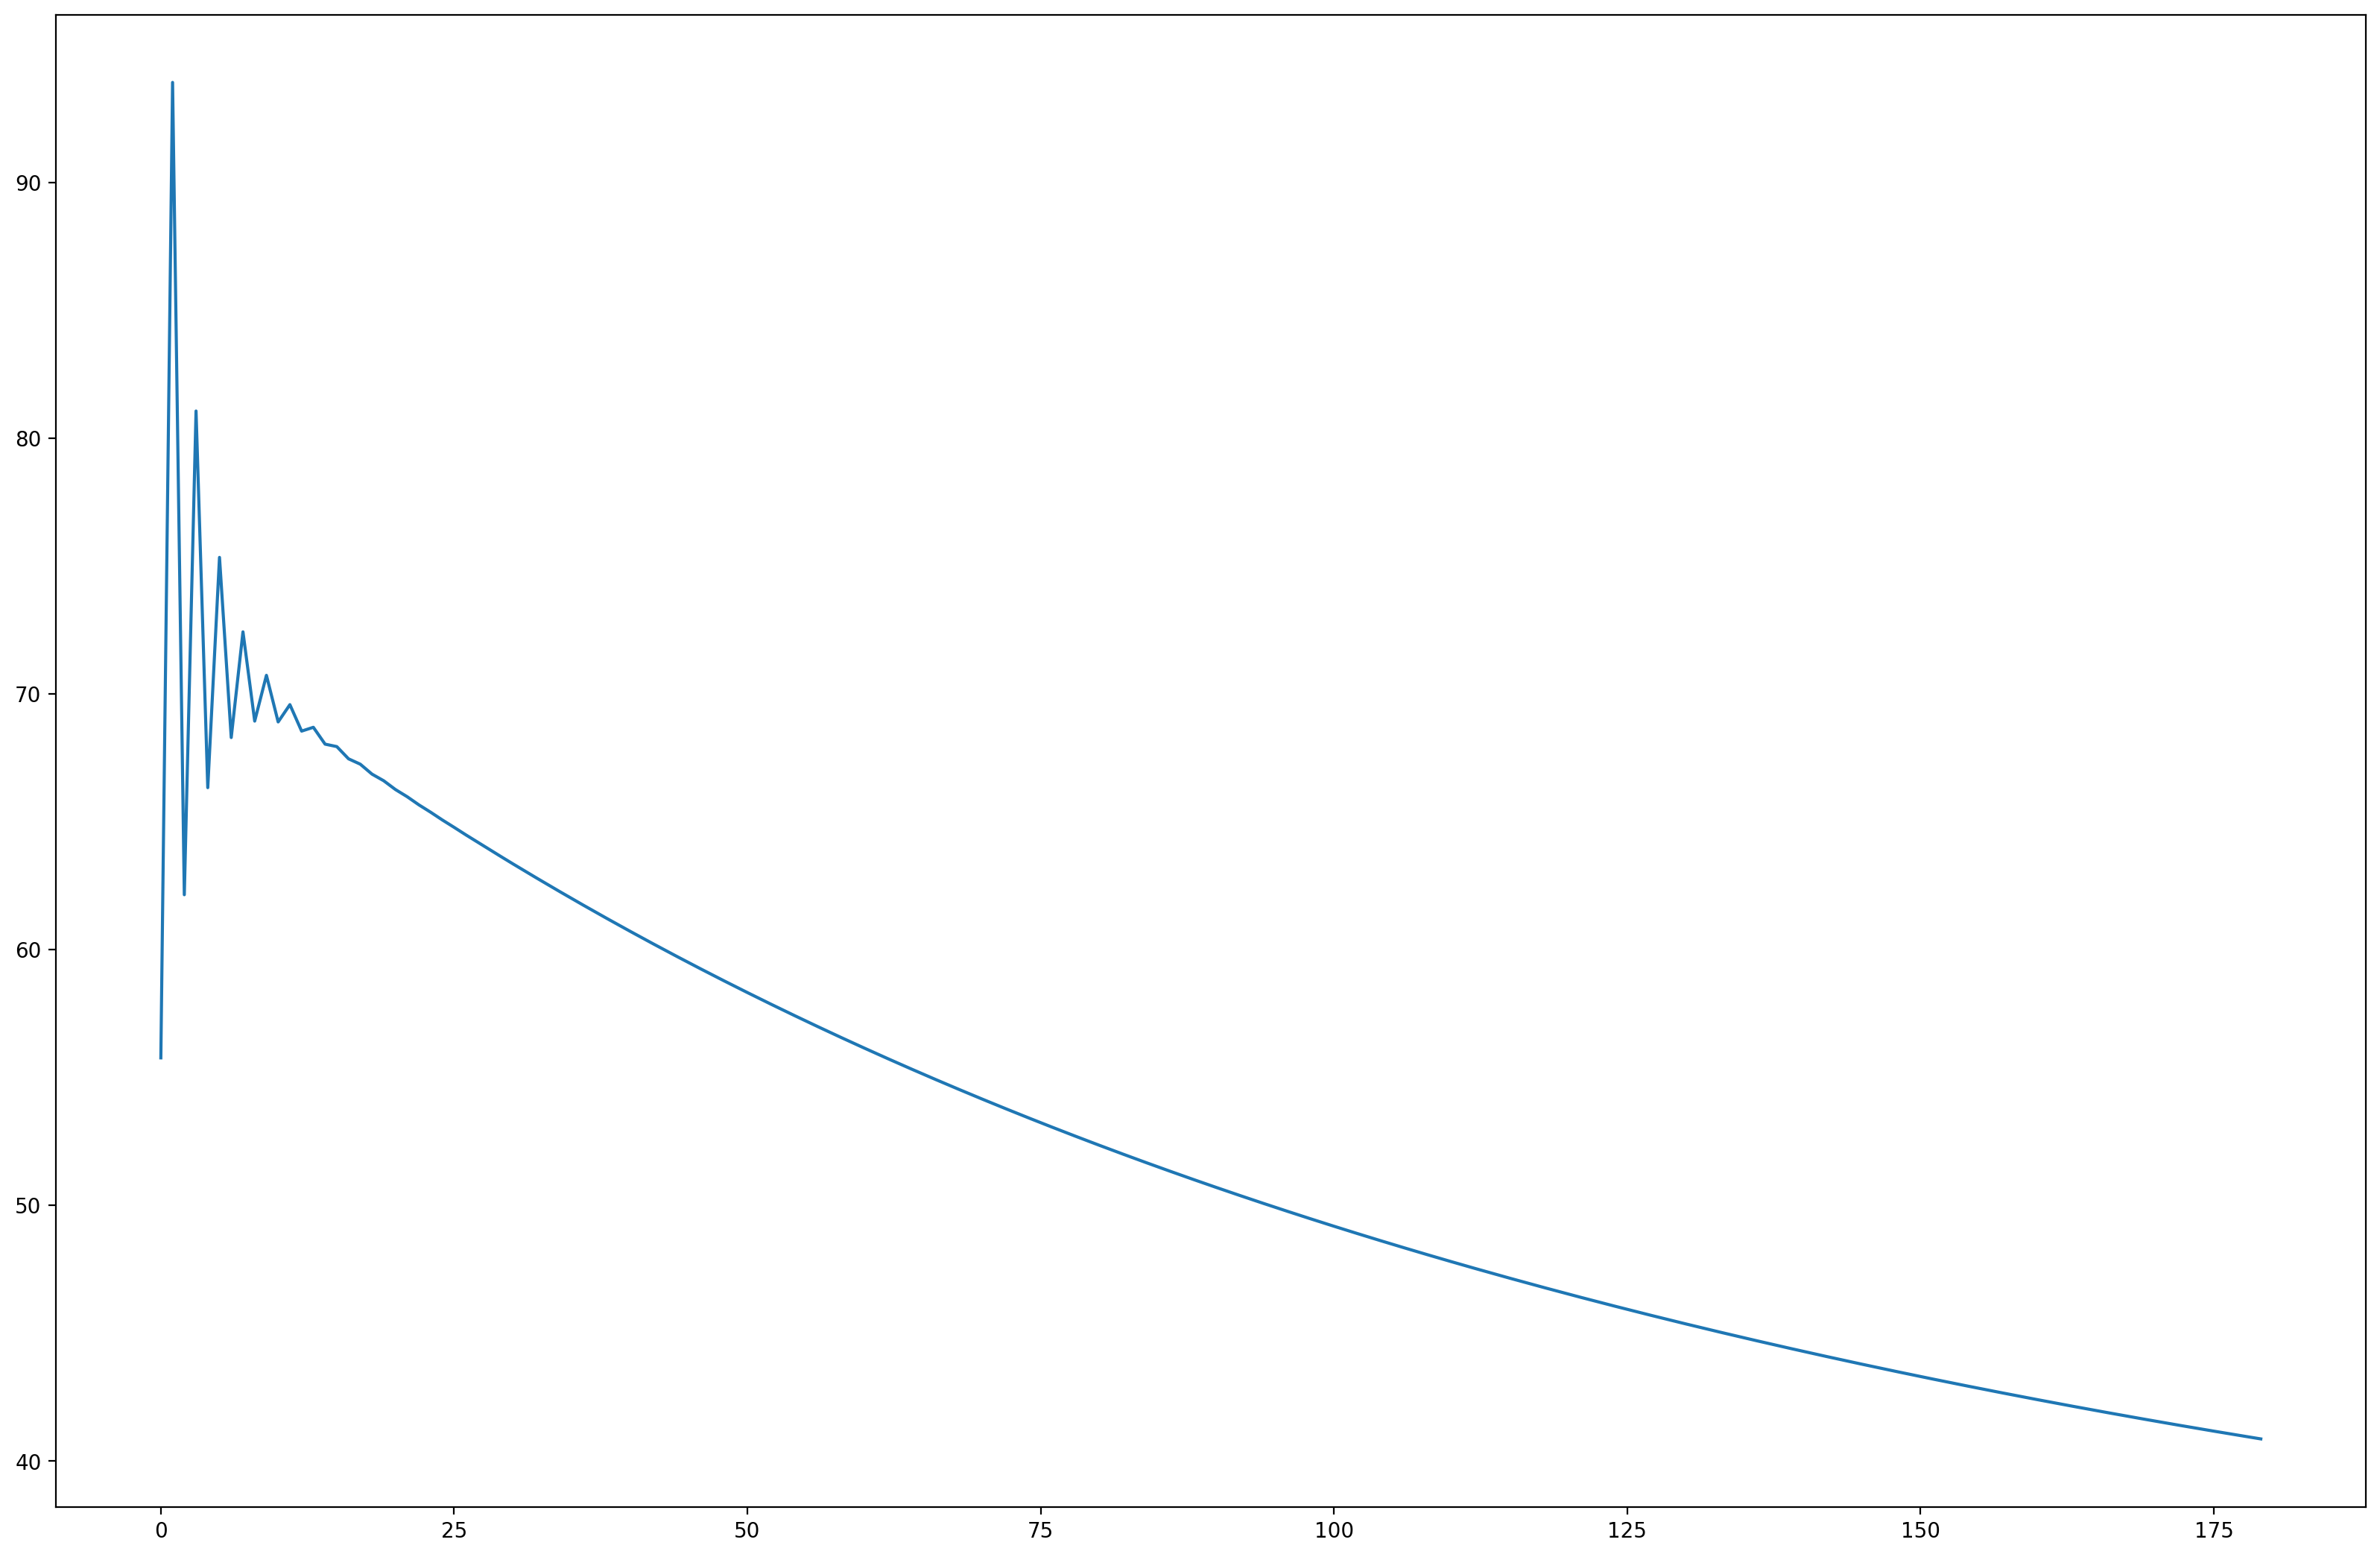

In [75]:
plt.plot(funk_model.hist["mse"][10:]);

Once the model has been trained, we can use it to predict the rating of a certain item by a given user.

In [76]:
user_id = 7
item_id = 95

pred = funk_model.predict_rating(user_id=user_id, item_id=item_id) + Y_mean[item_id-1]
int(pred)

3

In [77]:
user_id = 5
item_id = 1

pred = funk_model.predict_rating(user_id=user_id, item_id=item_id) + Y_mean[item_id-1]
int(pred)

2

Let's know see how our model performs on the validation dataset.

First, we need to extract the information about non-zero values in the validation matrix.

In [78]:
non_zero_indices = np.nonzero(Y_val)
non_zero_indices

(array([   4,    5,    5, ..., 4761, 4762, 4768]),
 array([331, 117, 125, ..., 337,  33, 127]))

Let's compare predictions and real rating values.

In [79]:
def validation_print(Y_val: np.ndarray, model: FunkSVD, num_prints: int = 10) -> None:
    """Function to print a string comparison between ratings and predictions.

    Parameters
    ----------
    Y_val : np.ndarray
        The validation matrix.
    model : FunkSVD
        The model to produce predictions.
    num_prints : int
        The number of printed lines.
    """
    rows, cols = non_zero_indices
    for k in range(num_prints):
        pred = int(model.predict_rating(rows[k]+1, cols[k]+1) + Y_mean[cols[k]])
        rating = Y_val[rows[k], cols[k]]

        print(f"For user {rows[k]+1} and movie {cols[k]+1}\nReal rating is {rating:<25} predicted rating is {pred}.")

In [82]:
validation_print(Y_val, funk_model, num_prints=10)

For user 5 and movie 332
Real rating is 1.0                       predicted rating is 1.
For user 6 and movie 118
Real rating is 4.5                       predicted rating is 4.
For user 6 and movie 126
Real rating is 4.5                       predicted rating is 3.
For user 12 and movie 422
Real rating is 4.0                       predicted rating is 2.
For user 13 and movie 213
Real rating is 2.0                       predicted rating is 2.
For user 14 and movie 80
Real rating is 4.0                       predicted rating is 3.
For user 23 and movie 256
Real rating is 3.5                       predicted rating is 1.
For user 24 and movie 312
Real rating is 5.0                       predicted rating is 3.
For user 25 and movie 116
Real rating is 3.0                       predicted rating is 2.
For user 26 and movie 86
Real rating is 5.0                       predicted rating is 1.
